IMPORTAZIONE LIBRERIE

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as signal

CAMBIO PATH PER ANALISI RISPETTO AL LOG DI VOLO CONSIDERATO

In [2]:
path_file = os.path.abspath(os.getcwd())
print(path_file)
os.chdir(path_file)

c:\Users\chiar\OneDrive\Desktop\MantenzionePreventiva\ProgettoManutenzionePreventiva\M1\NO_FAULT1


VARIABILE RCOU POTENZA MOTORI

In [3]:
#andiamo a prendere una potenza media di 1400 per considerare il momento il cui inizia/finisce il volo
rcou_m1 = pd.read_csv("RCOU.csv")
rcou_m1 = rcou_m1.drop(['LineNo','C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8'], axis=1)

rcou_m1 = rcou_m1[((rcou_m1['C9'] >= 1400) & (rcou_m1['C10'] >= 1400) & (rcou_m1['C11'] >= 1400) & (rcou_m1['C12'] >= 1400) & (rcou_m1['C13'] >= 1400) & (rcou_m1['C14']>= 1400))]

pd.set_option('display.max_rows',700)
display(rcou_m1)

,TimeUS,C9,C10,C11,C12,C13,C14
723,22802677,1482,1413,1403,1491,1437,1461
724,22812919,1409,1497,1464,1445,1416,1490
726,22832936,1452,1479,1479,1452,1464,1468
727,22843159,1489,1454,1470,1473,1485,1457
728,22853230,1487,1467,1480,1474,1488,1466
...,...,...,...,...,...,...,...
4963,68458392,1565,1456,1532,1493,1447,1573
4964,68468301,1569,1450,1519,1506,1438,1579
4965,68478609,1573,1442,1510,1512,1437,1577
4966,68488846,1553,1460,1514,1503,1422,1584


In [4]:
#xkf utilizzato per fare poi il confronto con i valori di roll, pitch e yaw in att
xkf1_m1 = pd.read_csv("XKF1_0.csv")
xkf1_m1 = xkf1_m1.drop(['LineNo','C','VN','VE','VD','dPD','PN','PE','PD','GX','GY','GZ','OH'], axis=1)
xkf1_m1 = xkf1_m1[((xkf1_m1['TimeUS'] >= 22802677) & (xkf1_m1['TimeUS'] <= 68509358))]
print(xkf1_m1)

        TimeUS  Roll  Pitch    Yaw
725   22810953  0.07  -0.36  13.25
726   22821068  0.05  -0.37  13.25
727   22830926  0.08  -0.40  13.25
728   22840872  0.12  -0.41  13.24
729   22851203  0.13  -0.40  13.24
...        ...   ...    ...    ...
4966  68466376 -4.55   0.90   5.76
4967  68476343 -4.50   1.05   5.69
4968  68486359 -4.46   1.19   5.63
4969  68496743 -4.40   1.35   5.58
4970  68507280 -4.34   1.52   5.53

[4246 rows x 4 columns]


In [5]:
att_m1 = pd.read_csv("ATT.csv")
att_m1 = att_m1.drop(['LineNo','ErrRP', 'ErrYaw', 'AEKF'], axis=1)
att_m1 = att_m1[((att_m1['TimeUS'] >= 22802677) & (att_m1['TimeUS'] <= 68509358))]
print(att_m1)

        TimeUS  DesRoll  Roll  DesPitch  Pitch  DesYaw    Yaw
725   22812172     0.00  0.07      0.00  -0.36   13.23  13.25
726   22822156     0.00  0.05      0.00  -0.37   13.23  13.25
727   22832236     0.00  0.08      0.00  -0.40   13.23  13.25
728   22842572     0.00  0.12      0.00  -0.41   13.23  13.24
729   22852585     0.00  0.13      0.00  -0.40   13.23  13.24
...        ...      ...   ...       ...    ...     ...    ...
4966  68467666    -1.83 -4.55     -0.26   0.90    5.99   5.76
4967  68477819    -1.76 -4.50     -0.24   1.05    5.99   5.69
4968  68488238    -1.70 -4.46     -0.22   1.19    5.99   5.63
4969  68498617    -1.59 -4.40     -0.21   1.35    5.99   5.58
4970  68508630    -1.49 -4.34     -0.20   1.52    5.99   5.53

[4246 rows x 7 columns]


In [6]:
#controllo corrispondenza valori roll, pitch, yaw
att_m1 = pd.merge_asof(att_m1, xkf1_m1, on="TimeUS", by=["Roll","Pitch","Yaw"], tolerance=100000)
print(att_m1)

        TimeUS  DesRoll  Roll  DesPitch  Pitch  DesYaw    Yaw
0     22812172     0.00  0.07      0.00  -0.36   13.23  13.25
1     22822156     0.00  0.05      0.00  -0.37   13.23  13.25
2     22832236     0.00  0.08      0.00  -0.40   13.23  13.25
3     22842572     0.00  0.12      0.00  -0.41   13.23  13.24
4     22852585     0.00  0.13      0.00  -0.40   13.23  13.24
...        ...      ...   ...       ...    ...     ...    ...
4241  68467666    -1.83 -4.55     -0.26   0.90    5.99   5.76
4242  68477819    -1.76 -4.50     -0.24   1.05    5.99   5.69
4243  68488238    -1.70 -4.46     -0.22   1.19    5.99   5.63
4244  68498617    -1.59 -4.40     -0.21   1.35    5.99   5.58
4245  68508630    -1.49 -4.34     -0.20   1.52    5.99   5.53

[4246 rows x 7 columns]


In [7]:
#elettricita' che scorre nel motore considerato, al momento ne consideriamo solo 1
esc_0_m1 = pd.read_csv("ESC_0.csv")
esc_0_m1 = esc_0_m1.drop(['LineNo','Instance', 'RawRPM', 'Volt', 'Temp', 'CTot', 'MotTemp', 'Err'], axis=1)
esc_0_m1 = esc_0_m1[((esc_0_m1['TimeUS'] >= 22802677) & (esc_0_m1['TimeUS'] <= 68509358))]
print(esc_0_m1)

       TimeUS   RPM  Curr
69   22845457  4097  2.65
70   22959904  4696  3.34
71   23059012  5180  4.33
72   23167332  5753  4.29
73   23272089  6060  3.92
74   23387634  6310  4.54
75   23499927  6266  4.03
76   23602066  6227  3.98
77   23709666  6214  4.15
78   23821462  6291  4.02
79   23922931  6084  4.91
80   24140073  6394  5.41
81   24241826  6617  4.74
82   24355612  6651  4.40
83   24458193  6428  4.01
84   24563045  6225  3.88
85   24677142  6148  4.24
86   24780143  6059  3.99
87   24894895  6102  3.90
88   25000816  5953  4.13
89   25111147  6179  3.85
90   25216093  6107  3.97
91   25322971  6011  3.83
92   25431084  5965  3.83
93   25536818  5914  3.87
94   25642731  5963  4.13
95   25755113  6115  4.20
96   25861944  6137  3.50
97   25969082  6031  3.42
98   26073662  5885  3.68
99   26183474  5912  2.90
100  26289834  5575  4.47
101  26413359  5965  4.12
102  26513798  6156  3.94
103  26614755  6016  4.24
104  26733173  6188  4.46
105  26825626  6368  4.02
106  2693885

In [8]:
#valori di accelerazione e del giroscopio
imu_2_m1 = pd.read_csv("IMU_2.csv")
imu_2_m1 = imu_2_m1.drop(['LineNo','I', 'EG', 'EA', 'T', 'GH', 'AH', 'GHz', 'AHz'], axis=1)
imu_2_m1 = imu_2_m1[((imu_2_m1['TimeUS'] >= 22802677) & (imu_2_m1['TimeUS'] <= 68509358))]
print(imu_2_m1)

         TimeUS      GyrX      GyrY      GyrZ      AccX      AccY       AccZ
2822   22804647  0.215221  0.014560 -0.022574 -0.112282  0.381192  -9.594953
2823   22806800  0.156002 -0.024915 -0.012062 -0.079717  0.377378  -9.648208
2824   22809472 -0.037405 -0.019961  0.017329 -0.060405  0.358252  -9.854769
2825   22812068 -0.037973  0.008214  0.023850 -0.004691  0.298002  -9.819793
2826   22814827  0.130319 -0.016521  0.005885  0.039536  0.185043  -9.777232
...         ...       ...       ...       ...       ...       ...        ...
19267  68498453  0.075021  0.311148 -0.022174 -0.538094  1.143453 -10.980790
19268  68500637  0.114351  0.326576 -0.035217 -0.474553  1.102632 -10.923170
19269  68503391  0.099024  0.306740 -0.042678 -0.434690  1.126460 -10.952590
19270  68506265  0.085362  0.299649 -0.042838 -0.413995  1.198366 -10.949310
19271  68508441  0.128423  0.319147 -0.035736 -0.442181  1.376053 -11.108960

[16450 rows x 7 columns]


In [9]:
#sincronizzazione dei tempi tra att e imu_2
m1_nofault = pd.merge_asof(att_m1, imu_2_m1, on="TimeUS",  tolerance= 100000)
print(m1_nofault)

        TimeUS  DesRoll  Roll  DesPitch  Pitch  DesYaw    Yaw      GyrX  \
0     22812172     0.00  0.07      0.00  -0.36   13.23  13.25 -0.037973   
1     22822156     0.00  0.05      0.00  -0.37   13.23  13.25 -0.065457   
2     22832236     0.00  0.08      0.00  -0.40   13.23  13.25 -0.010584   
3     22842572     0.00  0.12      0.00  -0.41   13.23  13.24  0.044989   
4     22852585     0.00  0.13      0.00  -0.40   13.23  13.24  0.011104   
...        ...      ...   ...       ...    ...     ...    ...       ...   
4241  68467666    -1.83 -4.55     -0.26   0.90    5.99   5.76  0.019334   
4242  68477819    -1.76 -4.50     -0.24   1.05    5.99   5.69  0.090357   
4243  68488238    -1.70 -4.46     -0.22   1.19    5.99   5.63  0.100214   
4244  68498617    -1.59 -4.40     -0.21   1.35    5.99   5.58  0.075021   
4245  68508630    -1.49 -4.34     -0.20   1.52    5.99   5.53  0.128423   

          GyrY      GyrZ      AccX      AccY       AccZ  
0     0.008214  0.023850 -0.004691  0.298

In [10]:
#sincronizzazione dei tempi tra la tabella ottenuta precedentemente e esc_0 (corrente che passa nel motore)
m1_nofault = pd.merge_asof(esc_0_m1, m1_nofault, on="TimeUS",  tolerance= 100000)
print(m1_nofault)

       TimeUS   RPM  Curr  DesRoll   Roll  DesPitch  Pitch  DesYaw    Yaw  \
0    22845457  4097  2.65     0.00   0.12      0.00  -0.41   13.23  13.24   
1    22959904  4696  3.34     0.00   0.16      0.00  -0.35   13.23  13.26   
2    23059012  5180  4.33     0.00   0.87      0.00  -0.39   13.23  13.48   
3    23167332  5753  4.29     0.00   1.39      0.00  -0.41   13.23  14.06   
4    23272089  6060  3.92    -0.12   1.65      0.00  -0.25   13.23  14.93   
5    23387634  6310  4.54    -1.32   1.36      0.00  -0.30   13.23  16.12   
6    23499927  6266  4.03    -3.09  -0.18      0.00   0.30   13.23  17.43   
7    23602066  6227  3.98    -3.85  -1.75      0.00   0.71   13.23  18.48   
8    23709666  6214  4.15    -4.07  -2.50      0.00   0.55   13.23  19.50   
9    23821462  6291  4.02    -3.37  -2.58      0.00   0.52   13.17  20.33   
10   23922931  6084  4.91    -2.26  -1.37      0.00   0.45   12.23  20.78   
11   24140073  6394  5.41    -0.68   1.63      0.00   0.18    6.90  19.98   

In [11]:
#aggiornamento del tempo ponendo a 0 il momento in cui il volo inizia per noi e settaggio della variabile guasto
m1_nofault["TimeUS"] = m1_nofault["TimeUS"] - m1_nofault.iloc[0]["TimeUS"]
m1_nofault["TimeUS"] = m1_nofault["TimeUS"].astype(int)
m1_nofault["Guasto"] = 0
print(m1_nofault)

       TimeUS   RPM  Curr  DesRoll   Roll  DesPitch  Pitch  DesYaw    Yaw  \
0           0  4097  2.65     0.00   0.12      0.00  -0.41   13.23  13.24   
1      114447  4696  3.34     0.00   0.16      0.00  -0.35   13.23  13.26   
2      213555  5180  4.33     0.00   0.87      0.00  -0.39   13.23  13.48   
3      321875  5753  4.29     0.00   1.39      0.00  -0.41   13.23  14.06   
4      426632  6060  3.92    -0.12   1.65      0.00  -0.25   13.23  14.93   
5      542177  6310  4.54    -1.32   1.36      0.00  -0.30   13.23  16.12   
6      654470  6266  4.03    -3.09  -0.18      0.00   0.30   13.23  17.43   
7      756609  6227  3.98    -3.85  -1.75      0.00   0.71   13.23  18.48   
8      864209  6214  4.15    -4.07  -2.50      0.00   0.55   13.23  19.50   
9      976005  6291  4.02    -3.37  -2.58      0.00   0.52   13.17  20.33   
10    1077474  6084  4.91    -2.26  -1.37      0.00   0.45   12.23  20.78   
11    1294616  6394  5.41    -0.68   1.63      0.00   0.18    6.90  19.98   

In [13]:
path_file = path_file.replace(r"M1\NO_FAULT1", "")
os.chdir(path_file)
m1_nofault.to_csv('m1_nofault.csv', index=False)
print(path_file)

c:\Users\chiar\OneDrive\Desktop\MantenzionePreventiva\ProgettoManutenzionePreventiva\


## Analisi nel tempo e in frequenza

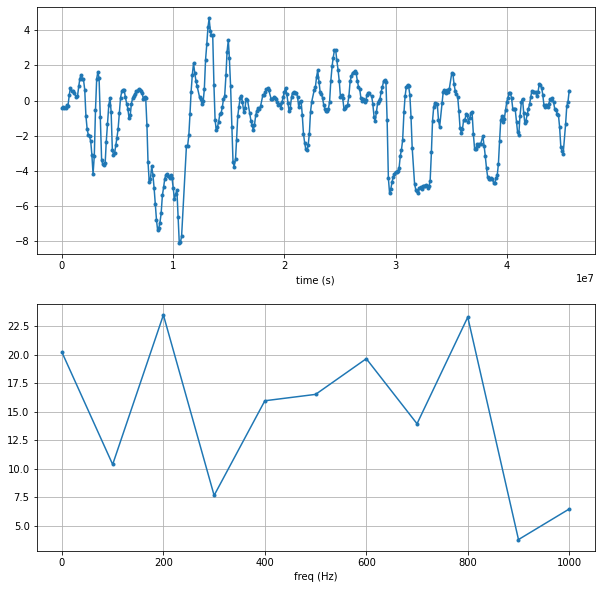

In [75]:
t = m1_nofault["TimeUS"] #tempo in microsecondi
y = m1_nofault["Pitch"] #pitch

Fs = 2000 # frequenza di campionamento
f0 = 100 # segnale di campionamento

N = int(Fs/f0) # numero di campioni
fstep = Fs / N # intervallo di frequenza
f = np.linspace(0,(N-1)*fstep,N) #frequency steps

# perform fft
X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2

# plot
fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()


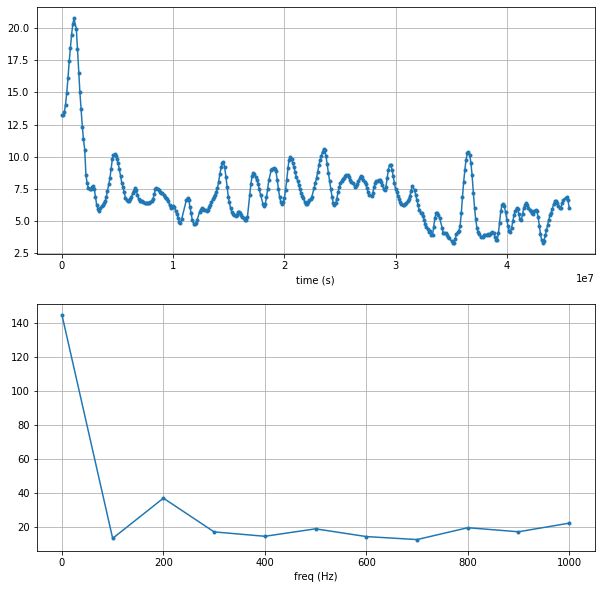

In [76]:
t = m1_nofault["TimeUS"]
y = m1_nofault["Yaw"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()


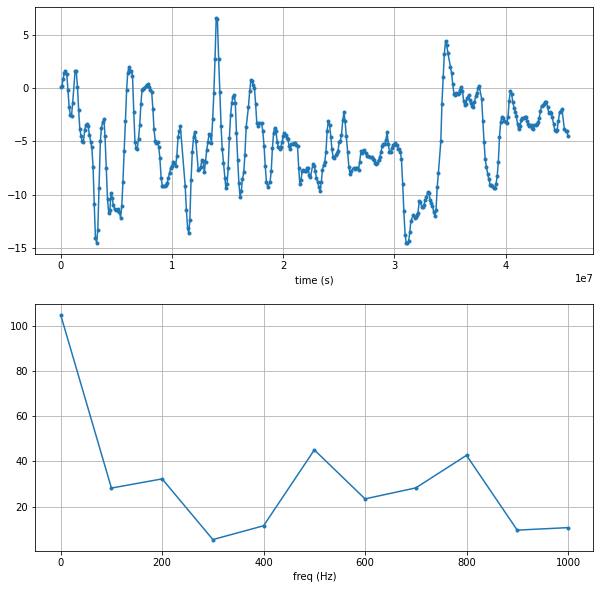

In [77]:
t = m1_nofault["TimeUS"]
y = m1_nofault["Roll"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()


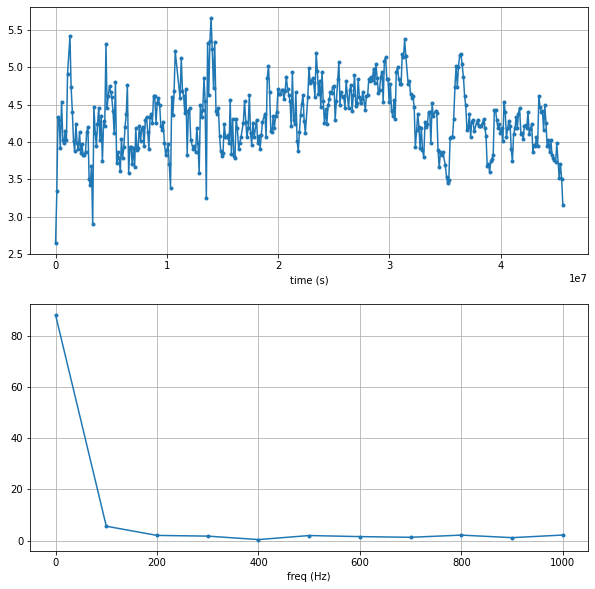

In [78]:
t = m1_nofault["TimeUS"]
y = m1_nofault["Curr"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()


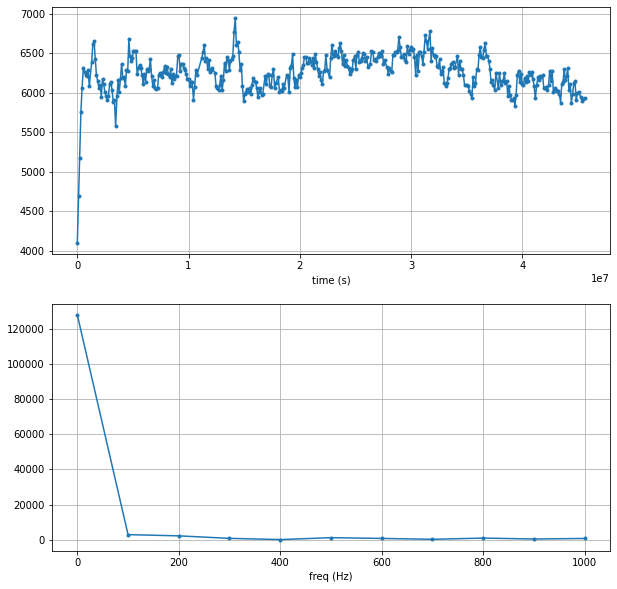

In [79]:
t = m1_nofault["TimeUS"]
y = m1_nofault["RPM"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()


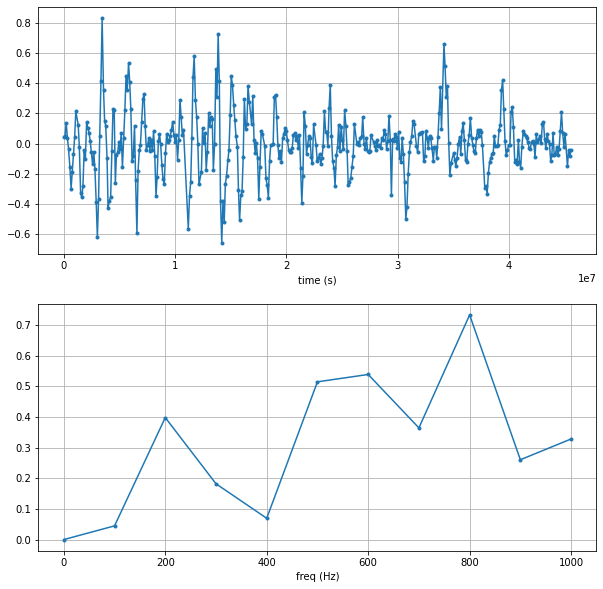

In [80]:
t = m1_nofault["TimeUS"]
y = m1_nofault["GyrX"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()


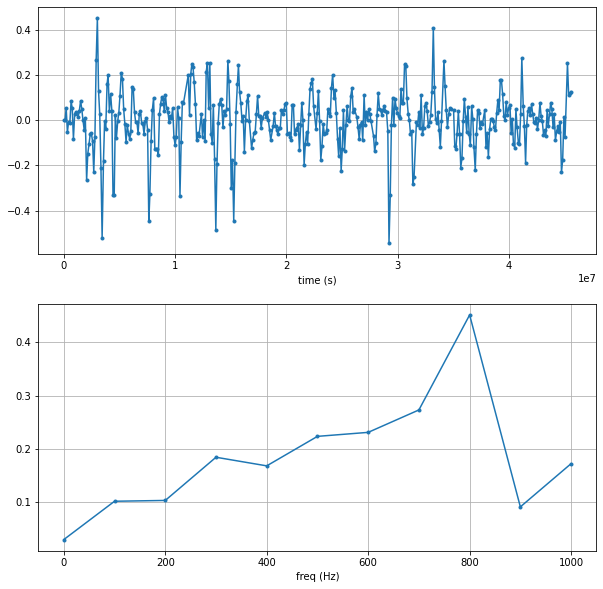

In [81]:
t = m1_nofault["TimeUS"]
y = m1_nofault["GyrY"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()


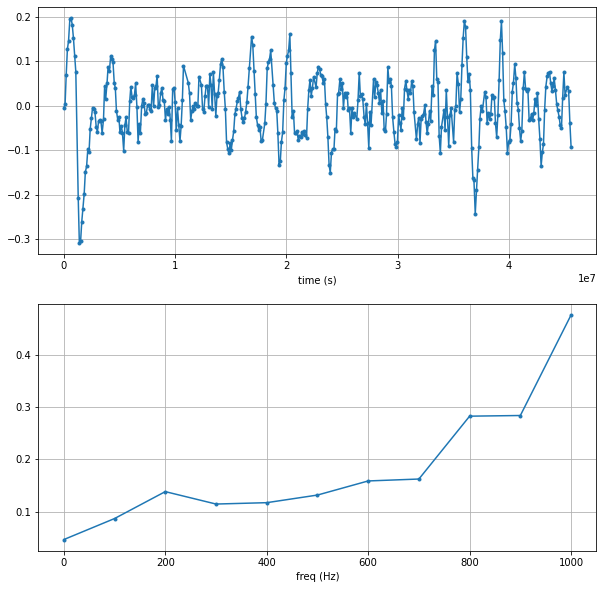

In [82]:
t = m1_nofault["TimeUS"]
y = m1_nofault["GyrZ"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()


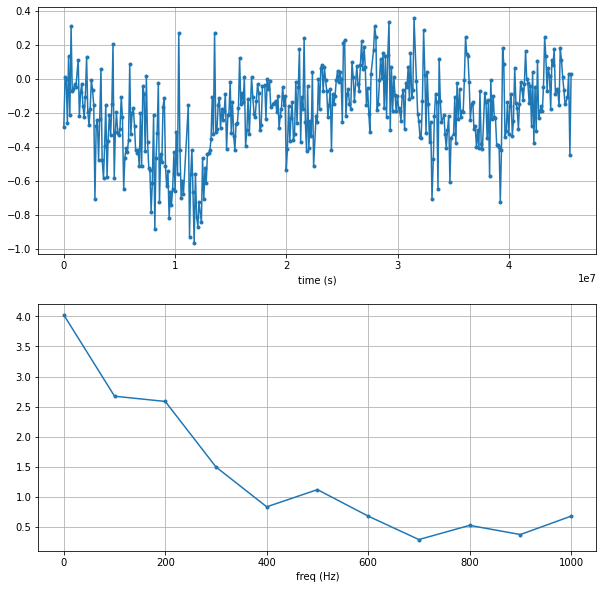

In [83]:
t = m1_nofault["TimeUS"]
y = m1_nofault["AccX"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()


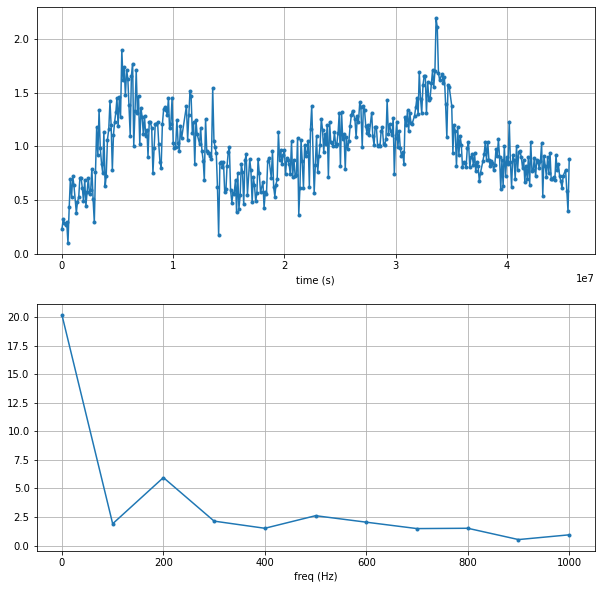

In [84]:
t = m1_nofault["TimeUS"]
y = m1_nofault["AccY"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()


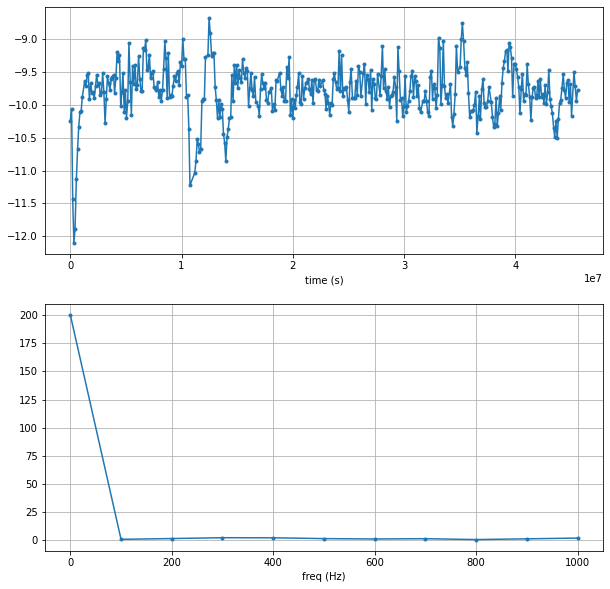

In [85]:
t = m1_nofault["TimeUS"]
y = m1_nofault["AccZ"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()
